In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Data Preparation

In [82]:
df=pd.read_csv('breast-cancer.csv')

In [83]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
df.shape

(569, 32)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [86]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Checking Correlation

In [87]:
# Creating duplicate dataframe
df_corr= df.copy()
df_corr= df_corr.drop("id", axis= "columns")

In [88]:
df_corr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In df_corr dataframe changing categorical values into numeticalvalues. 
Also renaming column name "diagnosis" to " malignant_cancer"

In [89]:
df_corr["diagnosis"]= df_corr["diagnosis"].map({"M": 1, "B": 0})
df_corr= df_corr.rename({"diagnosis": "malignant_cancer"}, axis= "columns")


In [90]:
df_corr.head()

,malignant_cancer,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
# Taking correlations
data= df_corr.corr()

#Creating a dataframe data_cancer by taking correlation of "malignant_cancer"
data_cancer= pd.DataFrame(data["malignant_cancer"])
data_cancer= data_cancer.drop("malignant_cancer", axis= "rows")


In [92]:
data_cancer.shape

(30, 1)

In [93]:
data_cancer = data_cancer.sort_values("malignant_cancer", ascending= False)

In [94]:
data_cancer

,malignant_cancer
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360
concavity_worst,0.659610


### Plotting Correlation Heatmap

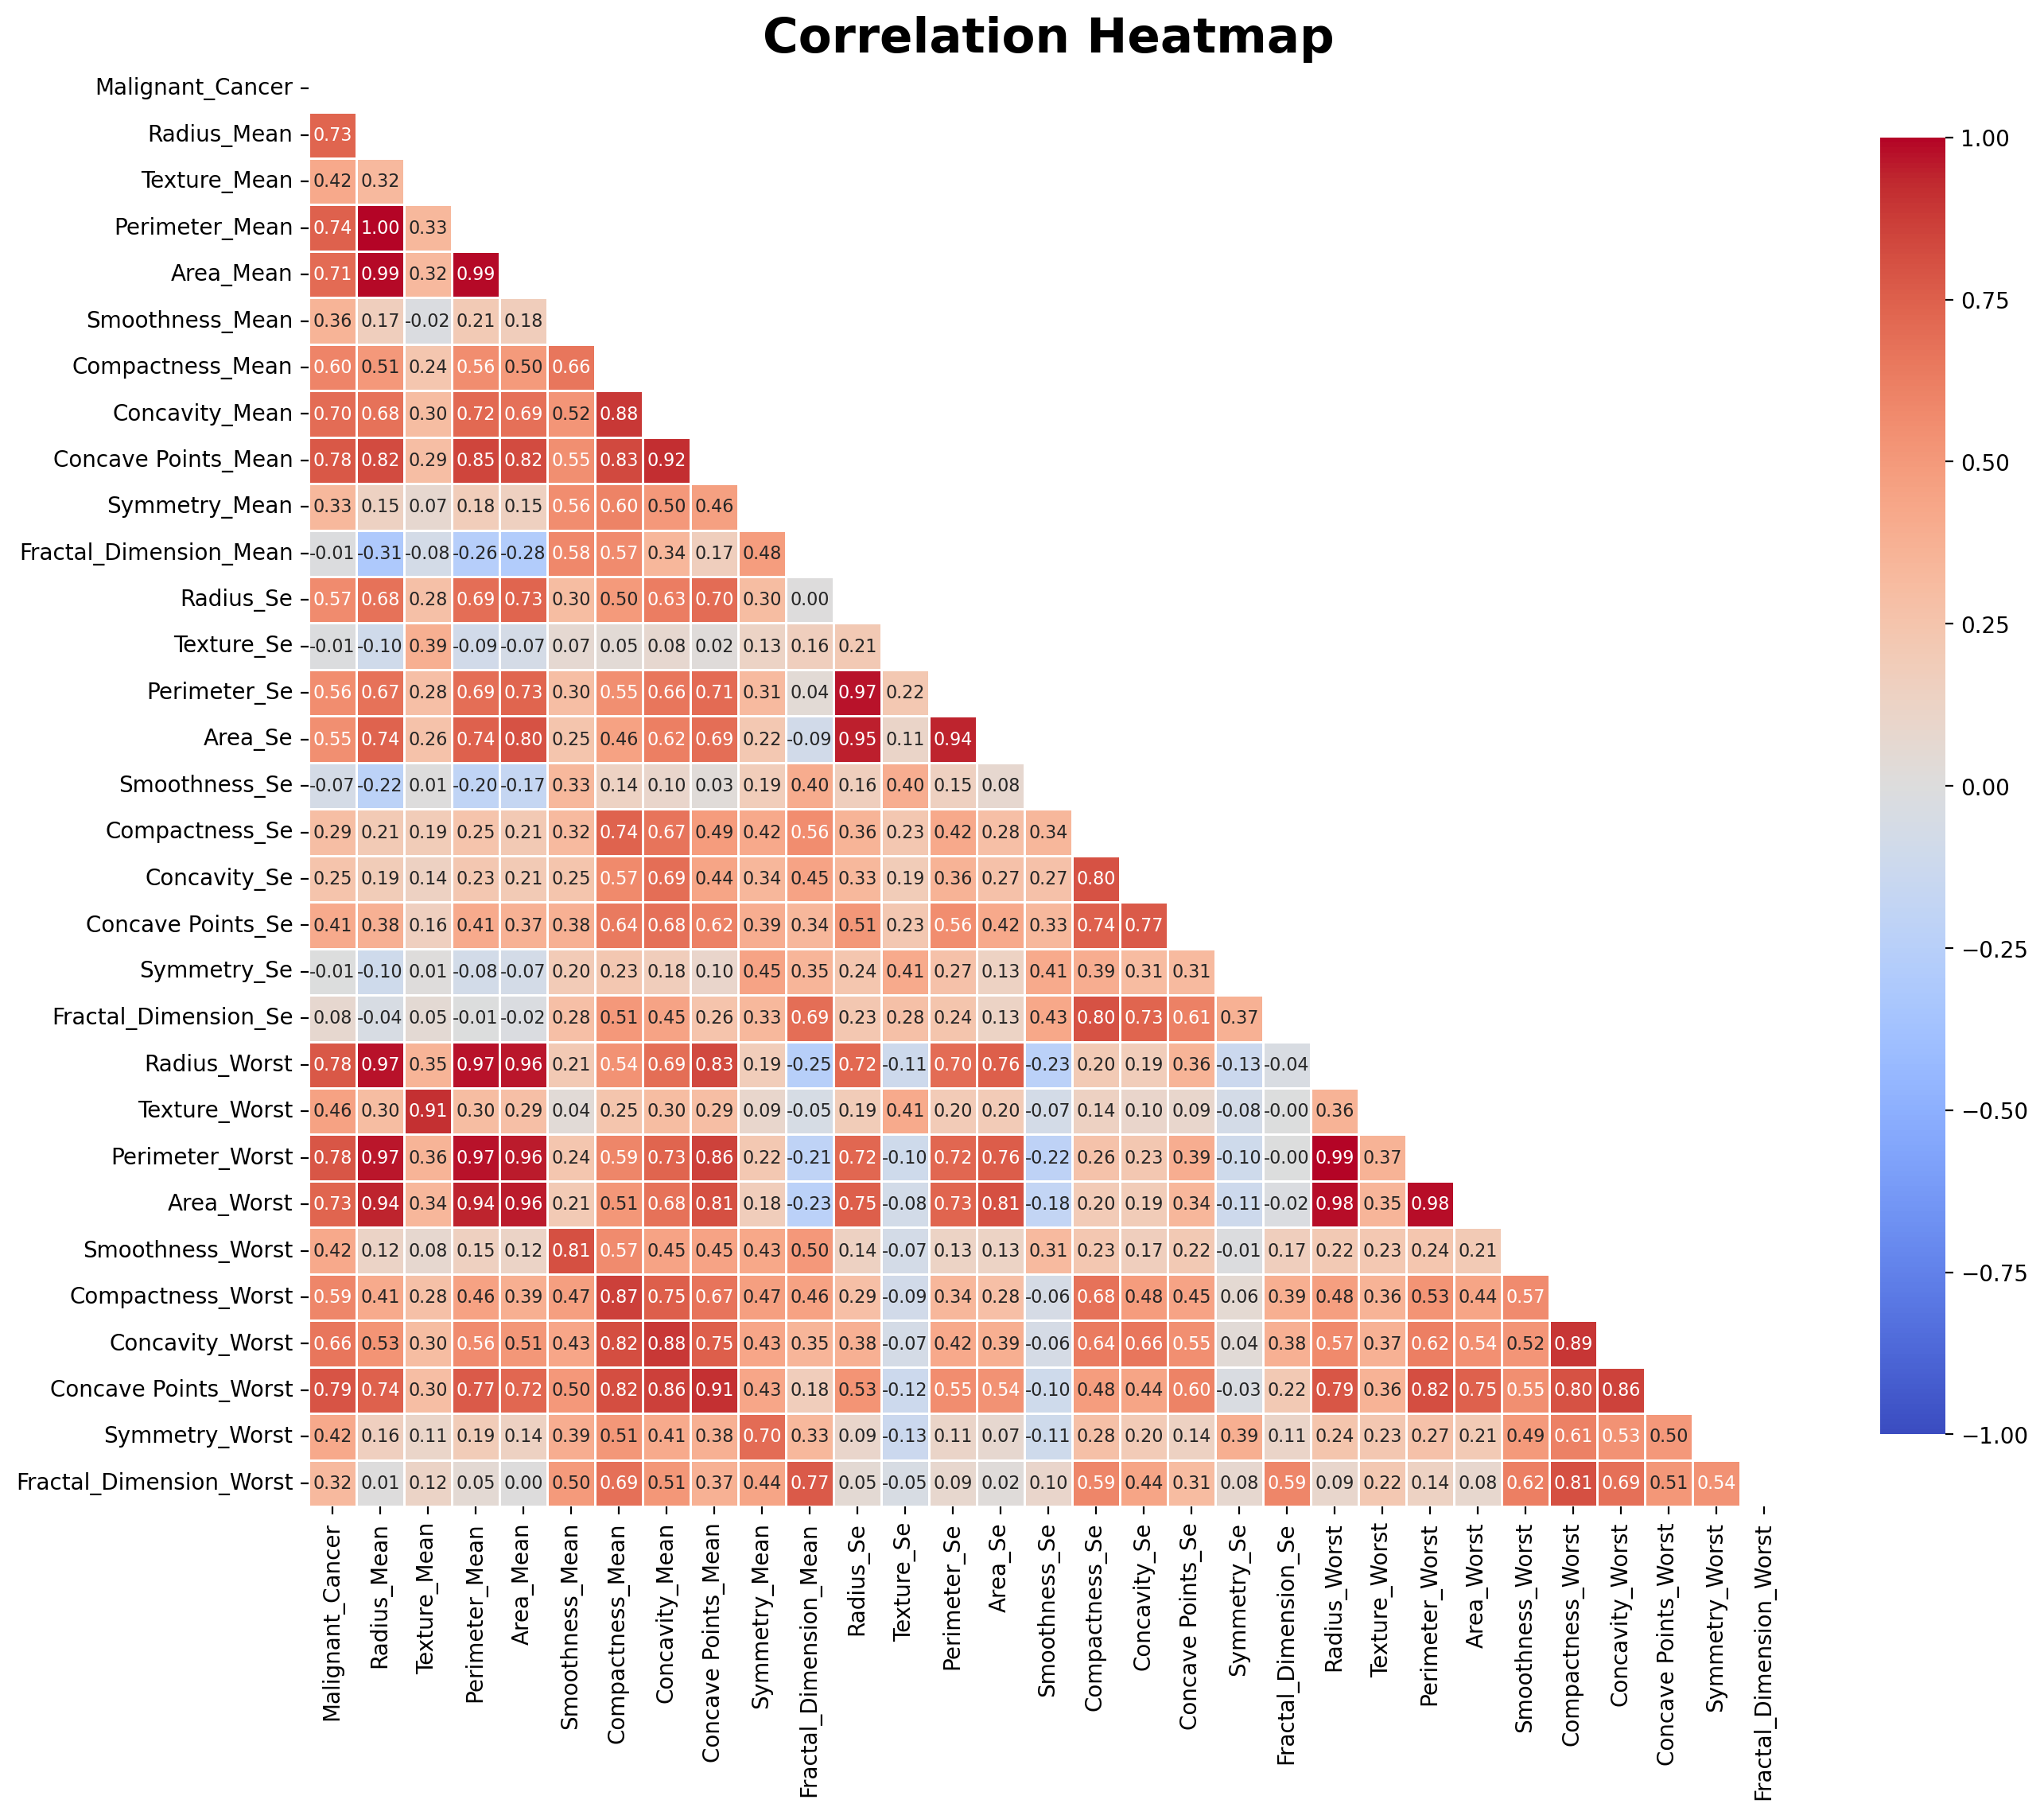

In [95]:
fig, ax = plt.subplots(figsize=(15, 12), dpi= 200)

mask = np.triu(np.ones_like(data, dtype = bool))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data = data, mask = mask, annot=True, fmt=".2f", cmap=cmap, linewidths= 1, 
            vmin=-1, vmax=1, cbar_kws={"shrink": .9}, annot_kws={"size":8})

yticks = [i.title() for i in data.index]
xticks = [i.title() for i in data.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
plt.title("Correlation Heatmap", fontsize=22, fontweight= "bold")
plt.show()

#### plotting Correlation Heatmap for malignant_cancer

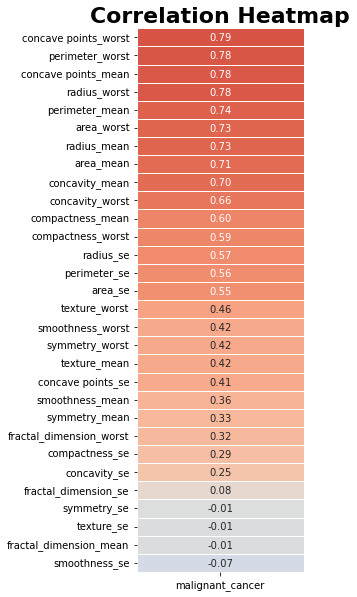

In [96]:
fig, ax = plt.subplots(figsize=(3, 10))

cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(data = data_cancer, annot=True, fmt=".2f", cmap=cmap, linewidths= 1, 
            vmin=-1, vmax=1, cbar= False)

plt.title("Correlation Heatmap", fontsize=22, fontweight= "bold")

plt.show()

We see that many features correlate strongly with breast cancer. This is a good thing. I assume our ML model will work great knowing this.

#### plotting count plot of values of diagnosis column of dataset df

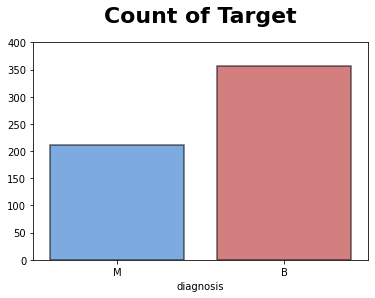

In [97]:
plot= sns.countplot(data= df, x= "diagnosis", palette=['#0b6fe7',"#cf1112"], 
              alpha= 0.6, edgecolor="0", linewidth=1.5)
plt.ylim(0, 400)
plt.title("Count of Target", fontsize=22, fontweight= "bold", pad= 20)
plt.ylabel("")
plt.show()

The difference is high but not too big. Based on this, I will not say that the data is imbalanced. I'm going to proceed normally.

### Creating ML Model

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
df=df.rename({'diagnosis': 'malignant_cancer'}, axis='columns')

In [63]:

x=df.drop(['id','malignant_cancer'], axis='columns')
y=df['malignant_cancer']
y=y.map({'M': 1,'B': 0})

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size= .25, random_state= 100)

In [65]:
from sklearn.preprocessing import StandardScaler
sr=StandardScaler()
x_train= sr.fit_transform(x_train)
x_test= sr.fit_transform(x_test)

Here im going to try a method to create models, fit models, make their predictions and calculate accuracy, precision, recall and F1 score all at once

In [66]:
LogisticRegression_model=LogisticRegression()

KNeighborsClassifier_model=KNeighborsClassifier()

SVC_model=SVC()

DecisionTreeClassifier_model= DecisionTreeClassifier()

RandomForestClassifier_model= RandomForestClassifier()

AdaBoostClassifier_model= AdaBoostClassifier()

GradientBoostingClassifier_model=GradientBoostingClassifier()

m=[LogisticRegression_model,KNeighborsClassifier_model,SVC_model, DecisionTreeClassifier_model,RandomForestClassifier_model, 
   AdaBoostClassifier_model, GradientBoostingClassifier_model]

In [68]:

predictions=[]
accuracy=[]
Precision=[]
Recall=[]
F1score=[]

for model in m:
    
    model.fit(x_train,y_train)
    
    model_predict= model.predict(x_test)
    predictions.append(model_predict)
    
    model_accuracy=accuracy_score(y_test,model_predict)
    accuracy.append(model_accuracy)
    
    model_Precision=precision_score(y_test, model_predict)
    Precision.append(model_Precision)
    
    model_recall=recall_score(y_test, model_predict)
    Recall.append(model_recall)
    
    model_f1score=f1_score(y_test, model_predict)
    F1score.append(model_f1score)
    
print(m)
   
    

[LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]


After finding predictions and calculating accuracy, precision, recall and F1 score, im going to create a new dataframe with all these values

In [69]:

score_df=pd.DataFrame(m, columns=['Model'])

In [70]:
score_df

,Model
0,LogisticRegression()
1,KNeighborsClassifier()
2,SVC()
3,DecisionTreeClassifier()
4,"(DecisionTreeClassifier(max_features='auto', r..."
5,"(DecisionTreeClassifier(max_depth=1, random_st..."
6,([DecisionTreeRegressor(criterion='friedman_ms...


In [71]:
score_df['Accuracy']=accuracy
score_df = score_df.sort_values(['Accuracy'])

score_df['Precision']=Precision
score_df = score_df.sort_values(['Precision'])

score_df['Recall']= Recall
score_df = score_df.sort_values(['Recall'])

score_df['F1score']= F1score
score_df = score_df.sort_values(['F1score'])

Here the prediction tries to predict Breast Cancer, I will select the model based on recall to minimize false negative

In [72]:
result_df= result_df.sort_values("Recall", ignore_index= True, ascending= False)

In [73]:
result_df


,Model,Accuracy,Precision,Recall,F1score
0,([DecisionTreeRegressor(criterion='friedman_ms...,0.965035,1.000000,0.910714,0.953271
1,"(DecisionTreeClassifier(max_depth=1, random_st...",0.951049,0.907407,0.892857,0.890909
2,DecisionTreeClassifier(),0.951049,1.000000,0.892857,0.933333
3,SVC(),0.951049,0.980392,0.892857,0.934579
4,LogisticRegression(),0.916084,1.000000,0.875000,0.933333
5,"(DecisionTreeClassifier(max_features='auto', r...",0.958042,1.000000,0.875000,0.934579
6,KNeighborsClassifier(),0.951049,0.980392,0.875000,0.943396


In [74]:
result_df['Model'][0], result_df['Model'][1], result_df['Model'][2]

(GradientBoostingClassifier(), AdaBoostClassifier(), DecisionTreeClassifier())

Plotting confusion matrix for all models

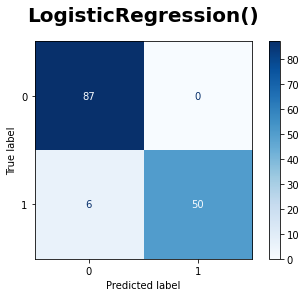

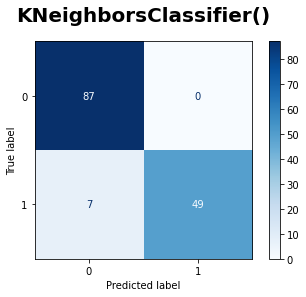

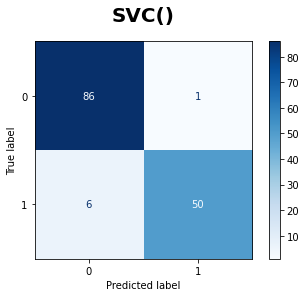

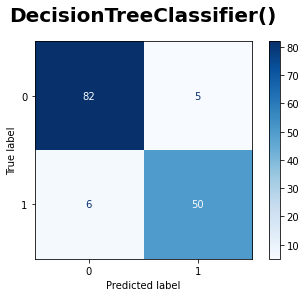

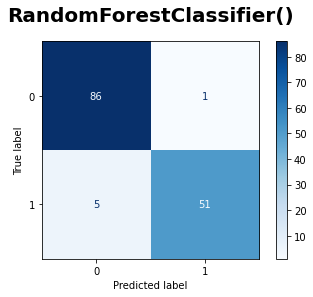

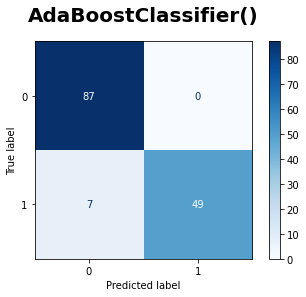

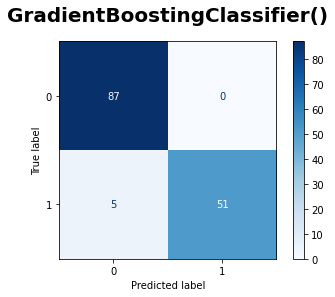

In [75]:
for model in m:
    model_predict= model.predict(x_test)
    cm = confusion_matrix(y_test, model_predict)
    disp_svm_tuned = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp= disp_svm_tuned.plot(cmap=plt.cm.Blues,values_format='g')
    plt.title(model, pad= 20, fontsize= 20, fontweight= "bold")
    